In [45]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [28]:
runs = ["ck","ch","cj", "ci","cg","cf"]
run_names = ["Default","New ice_nuc","1/2x dep","2x dep","1/2x sed","2x sed"]
colors = ["darkred","lightcoral","lightskyblue","mediumblue","lightgreen","darkgreen"]
markers = ["o","o","s","s","D","D"]


In [29]:
nt = 60*24+1
print(nt//24," days ({})".format(nt) )
run_dir = "/glade/scratch/sturbeville/DPSCREAM_simulations/"
qsmall=0
plot_type="jhist_olr-alb"

60  days (1441)


246.38286 0.1597658
248.01535 0.16048
246.87857 0.15600844
245.38641 0.16380851
245.28064 0.16013242
245.66544 0.1601198
saved as plots/jhist_olr-alb_ck-ch-cj-ci-cg-cf-diff.png


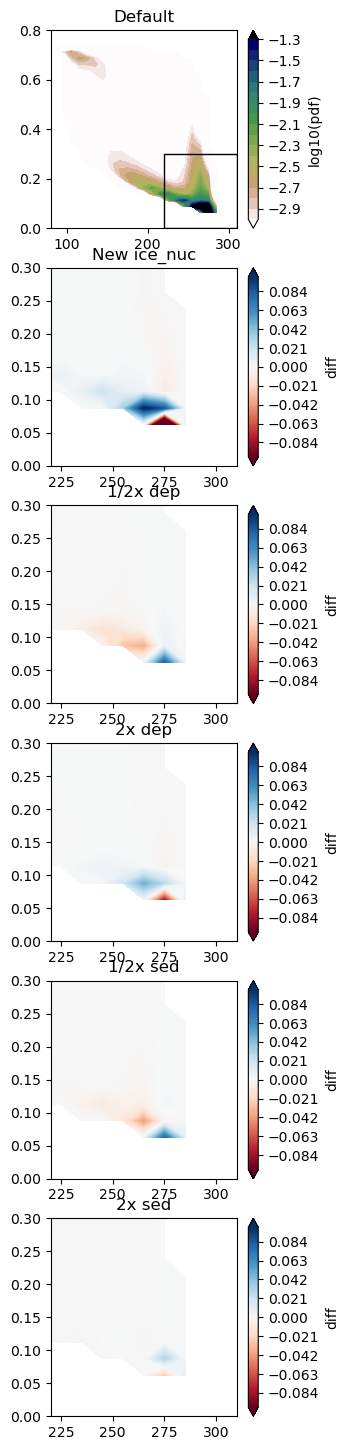

In [48]:
plot_diff=True
if plot_type=="jhist_olr-alb":
    fig, ax = plt.subplots(len(runs), 1, figsize=(3,3*len(runs)))
    diff=False
    savename = ""
    for i in range(len(runs)):
        savename += runs[i]+"-"
        ds = xr.open_dataset(run_dir+\
                             "scream_dp_RCE_SMALL_3km_"+runs[i]+\
                             "/run/scream_dp_RCE_SMALL_3km_"+runs[i]+\
                             ".eam.h1.2000-01-01-00000.nc")
        ds = ds.isel(time=slice(-nt, -1))
        olr = ds.FLUT
        swu = ds.FSUTOA
        swn = ds.FSNT
        alb = swu/(swu+swn)
        del swu, swn
        print(np.nanmean(olr),np.nanmean(alb))
        # coarsen
        
        # plot
        olr = olr.values.flatten()
        alb = alb.values.flatten()
        xbins = np.linspace(70,320,26)
        ybins = np.linspace(0,0.8,33)
        xmids = (xbins[1:]+xbins[:-1])/2
        ymids = (ybins[1:]+ybins[:-1])/2
        
        hist = np.histogram2d(olr, alb, bins=[xbins, ybins])[0]
        hist = np.where(hist>0, hist, np.nan)
        hist = hist/len(olr)
        if i==0:
            hist_default = hist

        if diff:
            levels = np.arange(-0.1,0.10001,0.001)
            hist = hist_default - hist
            cmap = "RdBu"
            clabel = "diff"
            ax[i].set(xlim=[220,310], ylim=[0,0.3])
        else:
            levels = np.arange(-3,-1.2,0.1)
            cmap = "gist_earth_r"
            clabel = "log10(pdf)"
            hist = np.log10(hist)
            ax[i].set(xlim=[80,310], ylim=[0,0.8])
        cf = ax[i].contourf(xmids, ymids, hist.T, cmap=cmap, 
                            levels=levels, extend="both")
        ax[i].set(title=run_names[i])
        plt.colorbar(cf, ax=ax[i], label=clabel)
        if (i==0) & (plot_diff):
            diff=True
    if diff:
        savename +="diff-"
    artist = mpatches.Rectangle((220, 0), 90, 0.3, ec="black", fc="none")
    ax[0].add_artist(artist)
    savename = "plots/jhist_olr-alb_"+savename[:-1]+".png"
    print("saved as",savename)
    plt.savefig(savename, dpi=200)
    plt.show()
    
    